# LOAN APPROVAL PREDICTION - ML

## Objective
- The objective of the loan approval prediction project is to develop a machine learning model that can accurately predict whether a loan application should be approved or rejected based on various features and attributes of the borrower and the loan request.

## Dataset Description
The dataset used for this project consists of :
- **loan_id** : Unique identifier for each loan.
- **no_of_dependents** : Number of dependents of the borrower.
- **education** : Education level of the borrower.
- **self_employed** : Indicates whether the borrower is self-employed or not.
- **income_annum** : Annual income of the borrower.
- **loan_amount** : Amount of the loan requested.
- **loan_term** : Duration of the loan (in months).
- **cibil_score** : Credit score of the borrower (CIBIL score).
- **residential_assets_value** : Value of residential assets owned by the borrower.
- **commercial_assets_value** : Value of commercial assets owned by the borrower.
- **luxury_assets_value** : Value of luxury assets owned by the borrower.
- **bank_asset_value** : Value of assets held in the bank by the borrower.
- **loan_status** : The status of the loan (e.g., approved, rejected, in process).

## Steps

- Importing Libraries

- Read Data

- Data Preprocessing

- Feature Engineering

- Model Training

## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Read the train data

- Reading the data into the pandas dataframe is the first step in machine learning. To read data from a file into a pandas DataFrame, we can use the 'pd.read_csv()' function if your data is in CSV format. If our data is in a different format, then there are corresponding functions available in pandas.

In [2]:
data=pd.read_csv('files/train/raw/train.csv')

In [3]:
data

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1104,3,Graduate,No,2700000,7800000,14,870,5400000,5300000,5700000,2100000,Approved
1,718,4,Not Graduate,No,3600000,8700000,14,302,6400000,3700000,7800000,4100000,Rejected
2,3131,3,Not Graduate,No,7100000,27900000,8,583,8900000,7600000,19600000,6300000,Approved
3,179,4,Not Graduate,No,5600000,13300000,20,869,3300000,7500000,20000000,6500000,Approved
4,119,0,Not Graduate,No,7200000,15800000,12,379,12700000,12200000,21500000,3600000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2983,1594,4,Not Graduate,Yes,1500000,3200000,10,858,1500000,0,4700000,1700000,Approved
2984,4061,3,Not Graduate,No,5800000,20600000,20,434,8400000,2700000,22600000,7000000,Rejected
2985,1347,2,Graduate,Yes,7700000,19300000,8,735,1200000,1900000,23800000,10400000,Approved
2986,3455,5,Graduate,No,1000000,3000000,4,896,2800000,1100000,2000000,1100000,Approved


## Data Preprocessing

- Data preprocessing is a process of preparing the raw data and making it suitable for a machine learning model. It is the first and crucial step while creating a machine learning model.

In [4]:
#To see the information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2988 entries, 0 to 2987
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   2988 non-null   int64 
 1   no_of_dependents          2988 non-null   int64 
 2   education                 2988 non-null   object
 3   self_employed             2988 non-null   object
 4   income_annum              2988 non-null   int64 
 5   loan_amount               2988 non-null   int64 
 6   loan_term                 2988 non-null   int64 
 7   cibil_score               2988 non-null   int64 
 8   residential_assets_value  2988 non-null   int64 
 9   commercial_assets_value   2988 non-null   int64 
 10  luxury_assets_value       2988 non-null   int64 
 11  bank_asset_value          2988 non-null   int64 
 12  loan_status               2988 non-null   object
dtypes: int64(10), object(3)
memory usage: 303.6+ KB


In [5]:
#To check if there is any null value in the dataset
data.isnull().sum()

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

In [6]:
#To check if there is any nan value in the dataset
data.isna().sum()

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

In [7]:
#To check if there is any duplicates in the dataset
data.duplicated().sum()

0

In [8]:
#To describe the dataset
data.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,2988.000000,2988.000000,2.988000e+03,2.988000e+03,2988.000000,2988.000000,2.988000e+03,2.988000e+03,2.988000e+03,2.988000e+03
mean,2139.129183,2.512718,5.069378e+06,1.521456e+07,10.938420,602.427376,7.527477e+06,4.987048e+06,1.518076e+07,5.015897e+06
std,1235.660195,1.689341,2.802102e+06,9.055057e+06,5.704727,171.985574,6.515378e+06,4.379714e+06,9.084297e+06,3.274403e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1082.750000,1.000000,2.700000e+06,7.700000e+06,6.000000,456.000000,2.200000e+06,1.400000e+06,7.500000e+06,2.400000e+06
50%,2141.500000,3.000000,5.100000e+06,1.470000e+07,10.000000,605.000000,5.700000e+06,3.700000e+06,1.470000e+07,4.600000e+06
75%,3210.250000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.250000,1.140000e+07,7.700000e+06,2.180000e+07,7.200000e+06
max,4269.000000,5.000000,9.900000e+06,3.880000e+07,20.000000,900.000000,2.910000e+07,1.900000e+07,3.910000e+07,1.470000e+07


## Outliers Finding

- Outliers are those data points that are significantly different from the rest of the dataset that are caused due to experimental error or human error.
- We can find outliers using various methods here we use box plot method to find if there is any outliers in the dataset

<Axes: >

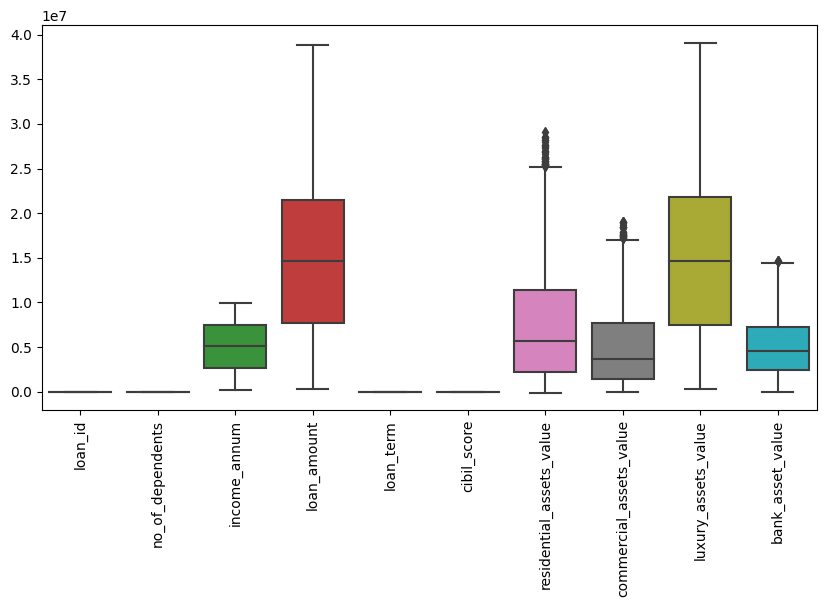

In [9]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.boxplot(data)

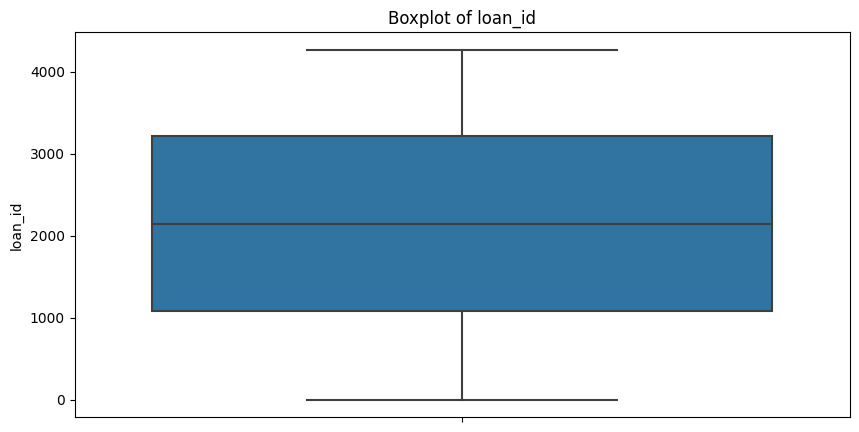

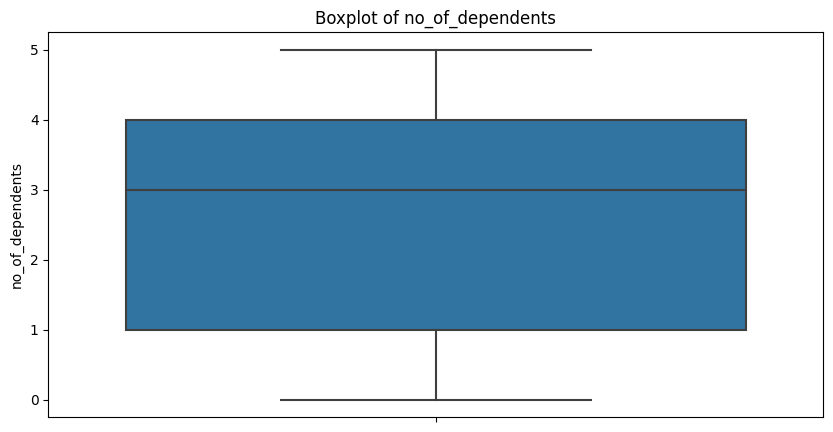

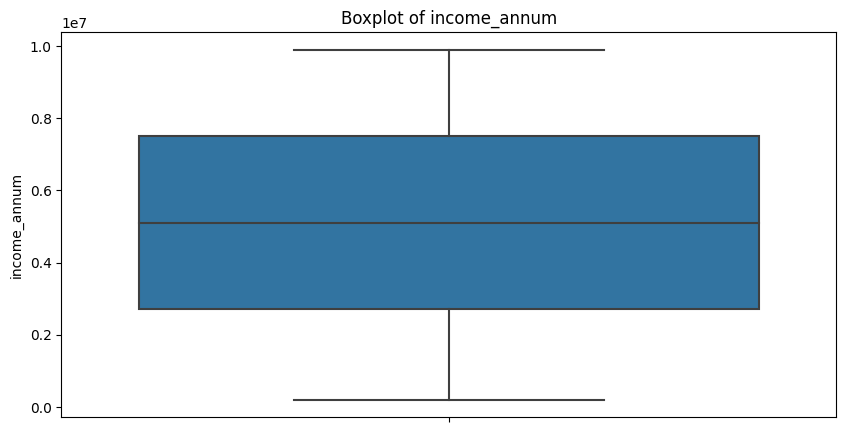

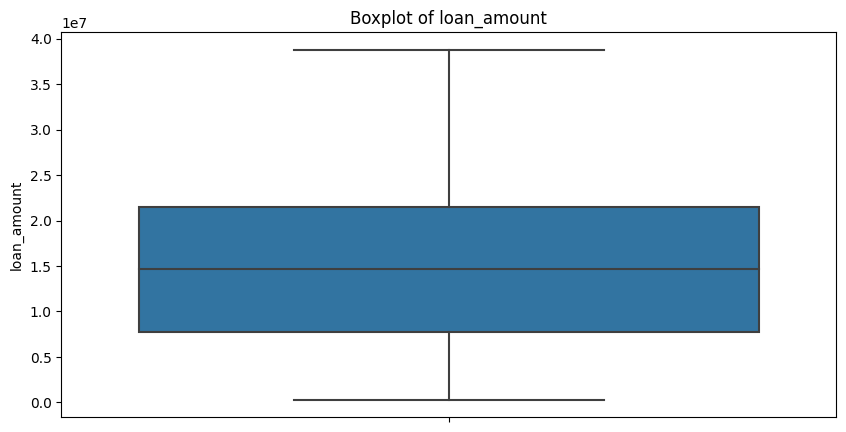

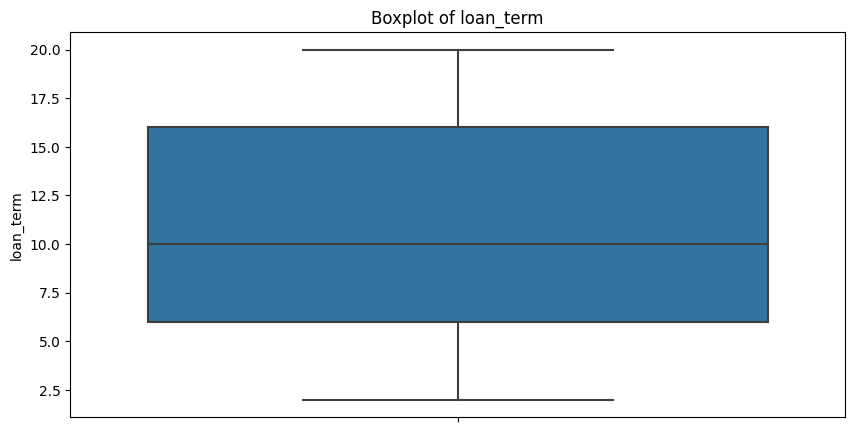

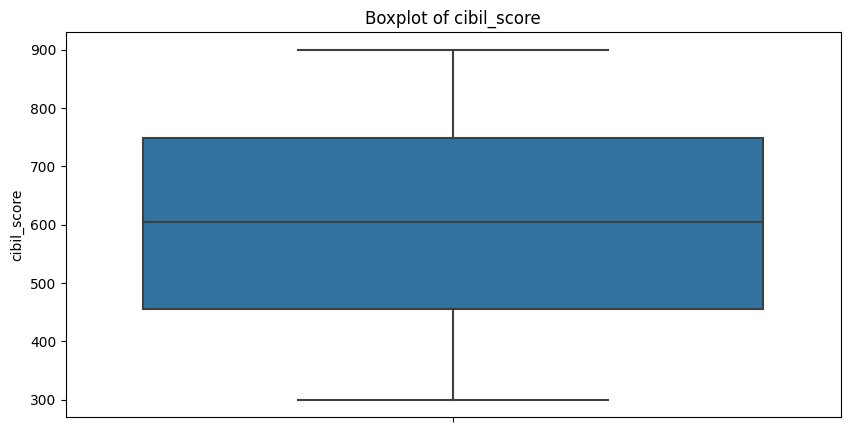

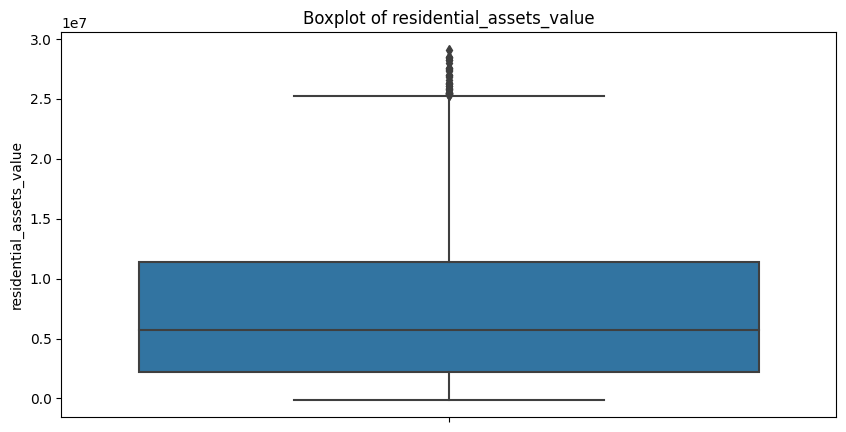

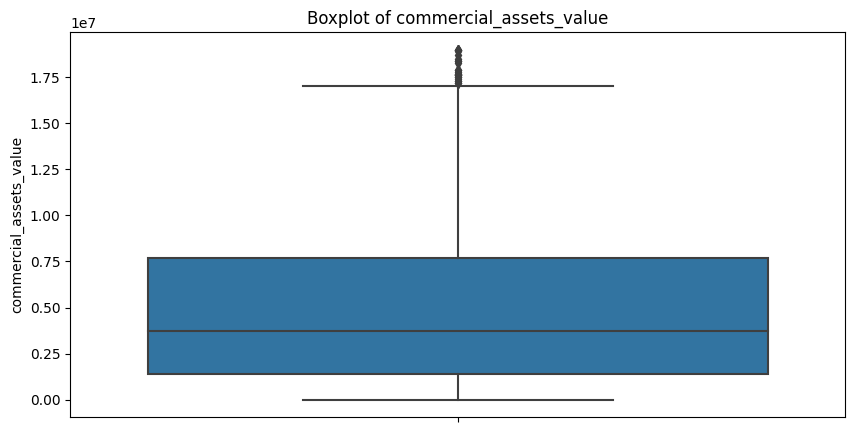

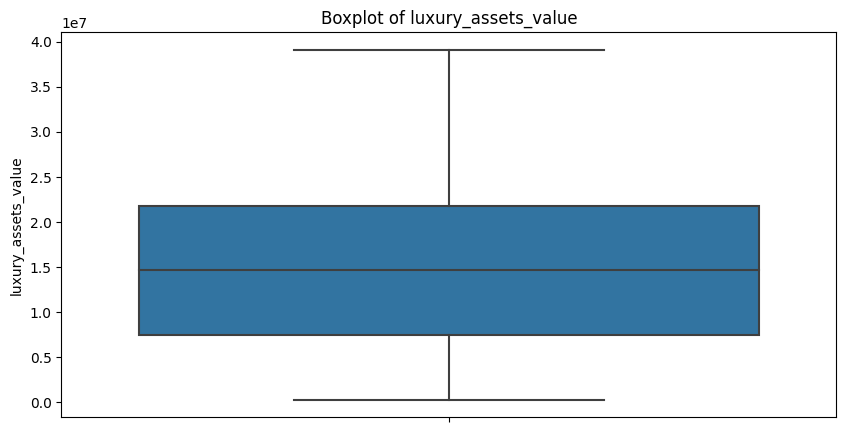

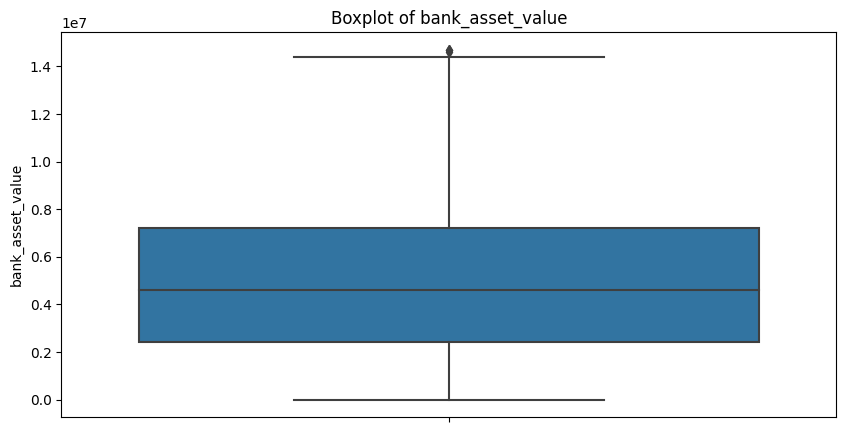

In [10]:
for column in data.columns:
    if data[column].dtype!='object':  # Only plot boxplot for numeric columns
        plt.figure(figsize=(10,5))
        sns.boxplot(y=column,data=data)
        plt.ylabel(column)
        plt.title(f"Boxplot of {column}")
        plt.show()

## Handling Outliers
- We can handle ouliers using capping method

In [11]:
for column in ['residential_assets_value','commercial_assets_value','bank_asset_value']:
    if data[column].dtype!='object':
        q1=data[column].quantile(0.25)
        q3=data[column].quantile(0.75)
        IQR=q3-q1
        lower_range=q1-(IQR*1.5)
        upper_range=q3+(IQR*1.5)
        data[column]=np.where(data[column]<lower_range,lower_range,
                     np.where(data[column]>upper_range,upper_range,
                     data[column]))

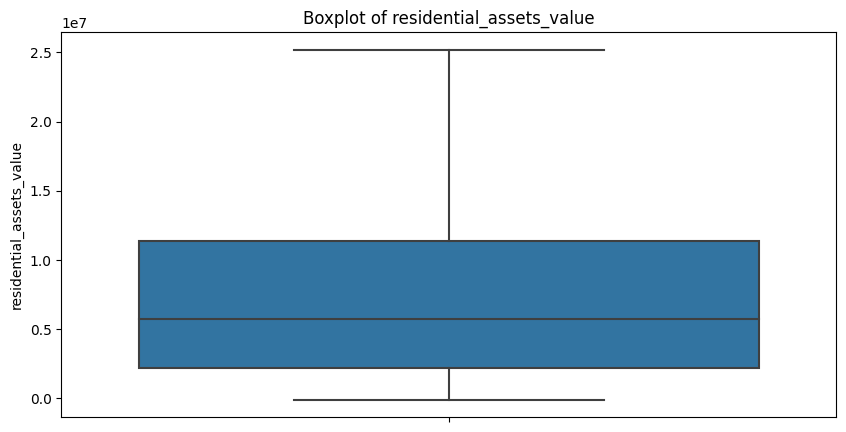

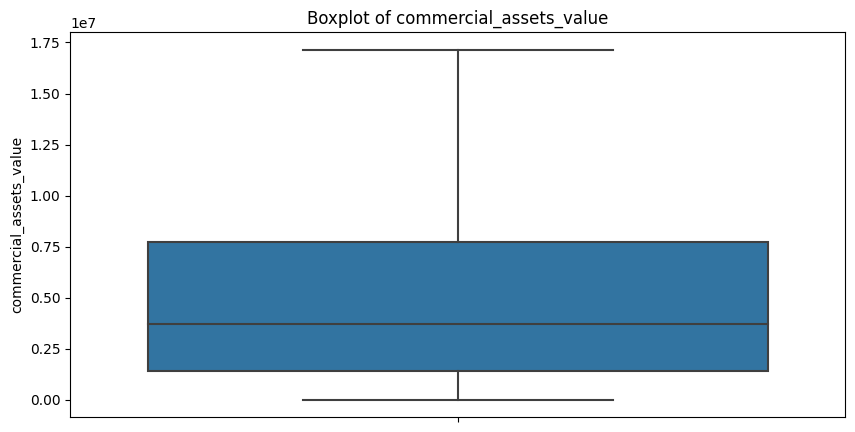

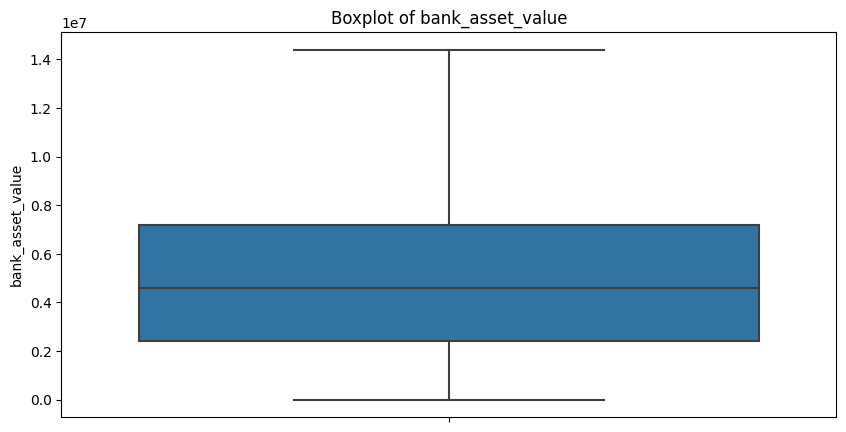

In [12]:
for column in ['residential_assets_value','commercial_assets_value','bank_asset_value']:
    if data[column].dtype!='object':  # Only plot boxplot for numeric columns
        plt.figure(figsize=(10,5))
        sns.boxplot(y=column,data=data)
        plt.ylabel(column)
        plt.title(f"Boxplot of {column}")
        plt.show()

In [13]:
data.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,2988.000000,2988.000000,2.988000e+03,2.988000e+03,2988.000000,2988.000000,2.988000e+03,2.988000e+03,2.988000e+03,2.988000e+03
mean,2139.129183,2.512718,5.069378e+06,1.521456e+07,10.938420,602.427376,7.509739e+06,4.980422e+06,1.518076e+07,5.015629e+06
std,1235.660195,1.689341,2.802102e+06,9.055057e+06,5.704727,171.985574,6.463909e+06,4.360298e+06,9.084297e+06,3.273624e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1082.750000,1.000000,2.700000e+06,7.700000e+06,6.000000,456.000000,2.200000e+06,1.400000e+06,7.500000e+06,2.400000e+06
50%,2141.500000,3.000000,5.100000e+06,1.470000e+07,10.000000,605.000000,5.700000e+06,3.700000e+06,1.470000e+07,4.600000e+06
75%,3210.250000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.250000,1.140000e+07,7.700000e+06,2.180000e+07,7.200000e+06
max,4269.000000,5.000000,9.900000e+06,3.880000e+07,20.000000,900.000000,2.520000e+07,1.715000e+07,3.910000e+07,1.440000e+07


## Feature Engineering

- Feature Engineering is the process of extracting and organizing the important features from raw data in such a way that it fits the purpose of the machine learning model.

In [14]:
#features and labels
df=data.copy()
y=df['loan_status'].copy()
x=df.drop(['loan_status'],axis=1).copy()

- The above method seperates the features and labels from the data. The label variables are copied into y amd the remaining features are copied into x.

## Splitting train and test datas

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,shuffle=True,random_state=123)

In [17]:
x_train.to_csv('files/train/raw/x_train.csv',index=False)
y_train.to_csv('files/train/raw/y_train.csv',index=False)

x_test.to_csv('files/evaluate/raw/x_test.csv',index=False)
y_test.to_csv('files/evaluate/raw/y_test.csv',index=False)

## Feature Encoding

- Feature encoding is the process of transforming the categorical datas into numerical data. By transforming the data our machine learning model can understand the data.

In [18]:
from sklearn.preprocessing import OrdinalEncoder

In [19]:
encoder=OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1)
x_encode=encoder.fit(x_train)
import joblib as jb
jb.dump(x_encode,'files/train/model/train_encode_model.pkl')
x_encode=encoder.transform(x_train)
x_train_encode=pd.DataFrame(x_encode,columns=x_train.columns)

- The ordinal encoder will transform categorical variables to numerical variables. To handle any unknown categorical data during testing and training we use the function handle_unknown='use_encoded-value'. The unknown_value=-1 function replaces the values of unknown categories as -1

In [20]:
x_train_encode

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,280.0,4.0,1.0,1.0,64.0,218.0,2.0,571.0,37.0,35.0,195.0,47.0
1,351.0,3.0,0.0,0.0,66.0,209.0,0.0,129.0,108.0,19.0,229.0,63.0
2,1200.0,1.0,0.0,0.0,18.0,47.0,2.0,560.0,6.0,29.0,55.0,15.0
3,1073.0,3.0,1.0,0.0,55.0,151.0,7.0,121.0,48.0,30.0,161.0,56.0
4,1262.0,4.0,1.0,0.0,24.0,69.0,7.0,304.0,14.0,10.0,55.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2086,674.0,4.0,1.0,0.0,15.0,46.0,8.0,528.0,49.0,22.0,59.0,18.0
2087,1688.0,4.0,0.0,0.0,5.0,15.0,8.0,418.0,5.0,13.0,19.0,6.0
2088,1202.0,2.0,0.0,1.0,85.0,261.0,0.0,466.0,86.0,24.0,285.0,103.0
2089,963.0,3.0,1.0,1.0,47.0,124.0,3.0,106.0,21.0,25.0,190.0,47.0


In [21]:
x_train_encode.to_csv('files/train/processed/encoded_processed.csv',index=False)

In [22]:
y_train=y_train.replace({' Approved':1,' Rejected':0})
y_train

30      1
989     1
292     1
1036    0
971     1
       ..
1147    1
2154    1
1766    1
1122    0
1346    1
Name: loan_status, Length: 2091, dtype: int64

<Axes: >

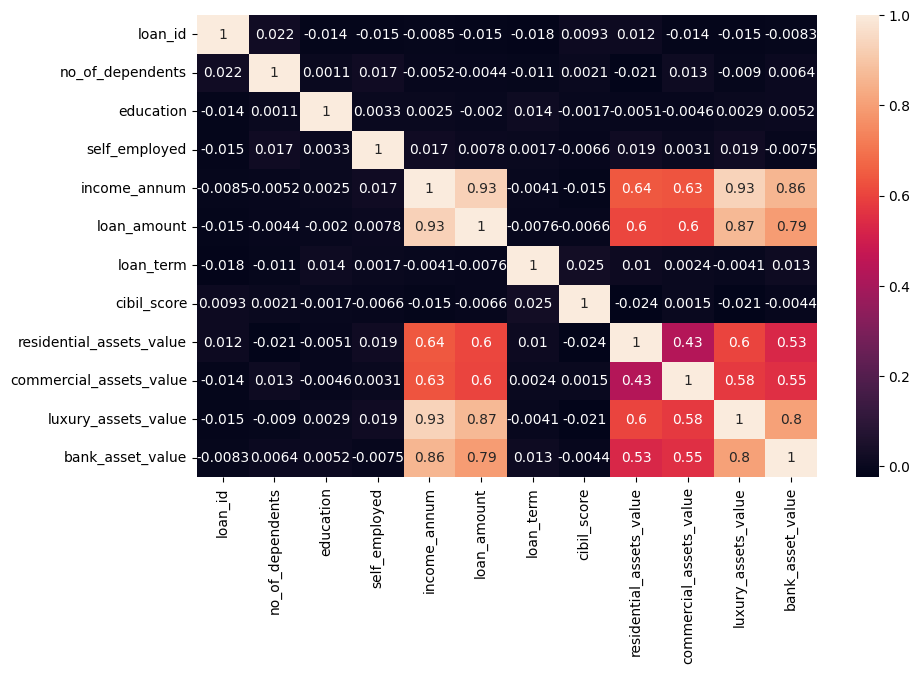

In [23]:
plt.figure(figsize=(10,6))
sns.heatmap(x_train_encode.corr(),annot=True)

In [24]:
#encoding test datas
encoder=OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1)
x_encode=encoder.fit(x_test)
import joblib as jb
jb.dump(x_encode,'files/evaluate/model/test_encode_model.pkl')
x_encode=encoder.transform(x_test)
x_test_encode=pd.DataFrame(x_encode,columns=x_test.columns)
x_test_encode

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,832.0,3.0,0.0,1.0,87.0,182.0,5.0,368.0,121.0,22.0,237.0,77.0
1,868.0,2.0,0.0,0.0,20.0,76.0,2.0,233.0,48.0,30.0,78.0,18.0
2,488.0,0.0,0.0,0.0,90.0,212.0,4.0,14.0,142.0,158.0,268.0,106.0
3,529.0,0.0,1.0,1.0,22.0,84.0,3.0,52.0,23.0,2.0,51.0,33.0
4,782.0,4.0,0.0,1.0,52.0,108.0,9.0,324.0,145.0,38.0,128.0,61.0
...,...,...,...,...,...,...,...,...,...,...,...,...
892,85.0,1.0,0.0,0.0,39.0,77.0,9.0,241.0,15.0,80.0,93.0,44.0
893,176.0,4.0,1.0,0.0,61.0,206.0,4.0,182.0,97.0,54.0,186.0,78.0
894,600.0,0.0,0.0,0.0,50.0,179.0,6.0,308.0,120.0,5.0,187.0,44.0
895,409.0,0.0,1.0,1.0,47.0,155.0,1.0,235.0,112.0,22.0,113.0,65.0


In [25]:
x_test_encode.to_csv('files/evaluate/processed/encoded_processed.csv',index=False)

In [26]:
y_test=y_test.replace({' Approved':1,' Rejected':0})
y_test

2648    1
1732    1
1193    0
813     0
1123    1
       ..
2453    1
120     0
2615    1
2558    1
5       1
Name: loan_status, Length: 897, dtype: int64

## Feature Selection
- Feature selection in machine learning is the process of finding the best set of features that allows one to build optimized model.

In [27]:
from sklearn.feature_selection import SelectKBest,chi2
bestfeatures=SelectKBest(score_func=chi2,k=10)
fit=bestfeatures.fit(x_train_encode,y_train)

- SelectKBest is the class used for feature selection, and chi2 is the scoring function that will be used to evaluate the features.

In [28]:
dfscores=pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(x.columns)
featurescores=pd.concat([dfcolumns,dfscores],axis=1)
featurescores.columns=['specs','scores']
print(featurescores.nlargest(10,'scores'))

                       specs         scores
7                cibil_score  122888.885892
5                loan_amount     171.467238
0                    loan_id     152.711245
9    commercial_assets_value      41.440015
6                  loan_term      30.105649
11          bank_asset_value       7.274937
8   residential_assets_value       3.598468
4               income_annum       1.392174
1           no_of_dependents       0.661131
3              self_employed       0.343665


In [29]:
feature=featurescores.nlargest(10,'scores')
feature

,specs,scores
7,cibil_score,122888.885892
5,loan_amount,171.467238
0,loan_id,152.711245
9,commercial_assets_value,41.440015
6,loan_term,30.105649
11,bank_asset_value,7.274937
8,residential_assets_value,3.598468
4,income_annum,1.392174
1,no_of_dependents,0.661131
3,self_employed,0.343665


In [30]:
feature_list=feature['specs'].to_list()
feature_list

['cibil_score',
 'loan_amount',
 'loan_id',
 'commercial_assets_value',
 'loan_term',
 'bank_asset_value',
 'residential_assets_value',
 'income_annum',
 'no_of_dependents',
 'self_employed']

In [31]:
jb.dump(feature_list,'files/train/model/feature_selected_model.pkl')

['files/train/model/feature_selected_model.pkl']

In [32]:
feature_selected=x_train_encode[feature_list]
feature_selected

,cibil_score,loan_amount,loan_id,commercial_assets_value,loan_term,bank_asset_value,residential_assets_value,income_annum,no_of_dependents,self_employed
0,571.0,218.0,280.0,35.0,2.0,47.0,37.0,64.0,4.0,1.0
1,129.0,209.0,351.0,19.0,0.0,63.0,108.0,66.0,3.0,0.0
2,560.0,47.0,1200.0,29.0,2.0,15.0,6.0,18.0,1.0,0.0
3,121.0,151.0,1073.0,30.0,7.0,56.0,48.0,55.0,3.0,0.0
4,304.0,69.0,1262.0,10.0,7.0,14.0,14.0,24.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2086,528.0,46.0,674.0,22.0,8.0,18.0,49.0,15.0,4.0,0.0
2087,418.0,15.0,1688.0,13.0,8.0,6.0,5.0,5.0,4.0,0.0
2088,466.0,261.0,1202.0,24.0,0.0,103.0,86.0,85.0,2.0,1.0
2089,106.0,124.0,963.0,25.0,3.0,47.0,21.0,47.0,3.0,1.0


In [33]:
feature_selected.to_csv('files/train/processed/feature_selected_x_train.csv')

## Model Training

-  Model training is a process in which a machine learning algorithm is fed with training data from which it can learn.

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
lor=LogisticRegression()
lor.fit(feature_selected,y_train)
print('Train Score : ',lor.score(feature_selected,y_train)*100)

Train Score :  88.57006217120995


In [36]:
jb.dump(lor,'files/train/model/lor.pkl')

['files/train/model/lor.pkl']

## Prediction

## Load x test and y test

In [37]:
feature_selection=jb.load('files/train/model/feature_selected_model.pkl')
model=jb.load('files/train/model/lor.pkl')

In [38]:
feature_selection

['cibil_score',
 'loan_amount',
 'loan_id',
 'commercial_assets_value',
 'loan_term',
 'bank_asset_value',
 'residential_assets_value',
 'income_annum',
 'no_of_dependents',
 'self_employed']

In [39]:
model

LogisticRegression()

In [40]:
feature_selected=x_test_encode[feature_selection]
feature_selected

,cibil_score,loan_amount,loan_id,commercial_assets_value,loan_term,bank_asset_value,residential_assets_value,income_annum,no_of_dependents,self_employed
0,368.0,182.0,832.0,22.0,5.0,77.0,121.0,87.0,3.0,1.0
1,233.0,76.0,868.0,30.0,2.0,18.0,48.0,20.0,2.0,0.0
2,14.0,212.0,488.0,158.0,4.0,106.0,142.0,90.0,0.0,0.0
3,52.0,84.0,529.0,2.0,3.0,33.0,23.0,22.0,0.0,1.0
4,324.0,108.0,782.0,38.0,9.0,61.0,145.0,52.0,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...
892,241.0,77.0,85.0,80.0,9.0,44.0,15.0,39.0,1.0,0.0
893,182.0,206.0,176.0,54.0,4.0,78.0,97.0,61.0,4.0,0.0
894,308.0,179.0,600.0,5.0,6.0,44.0,120.0,50.0,0.0,0.0
895,235.0,155.0,409.0,22.0,1.0,65.0,112.0,47.0,0.0,1.0


In [41]:
y_pred=pd.DataFrame(model.predict(feature_selected))
y_pred

,0
0,1
1,1
2,0
3,0
4,0
...,...
892,1
893,0
894,1
895,1


## Evaluation of model

In [42]:
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

In [43]:
print(classification_report(y_pred,y_test))
cm=confusion_matrix(y_pred,y_test)

              precision    recall  f1-score   support

           0       0.93      0.78      0.85       381
           1       0.86      0.96      0.90       516

    accuracy                           0.88       897
   macro avg       0.89      0.87      0.88       897
weighted avg       0.89      0.88      0.88       897



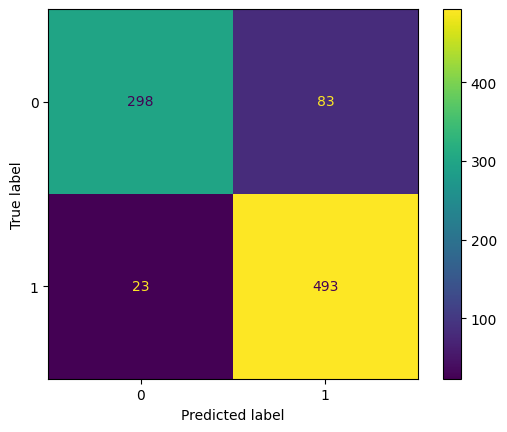

In [44]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [45]:
y_pred.replace({1:' Approved',0:' Rejected'},inplace=True)
y_pred

,0
0,Approved
1,Approved
2,Rejected
3,Rejected
4,Rejected
...,...
892,Approved
893,Rejected
894,Approved
895,Approved


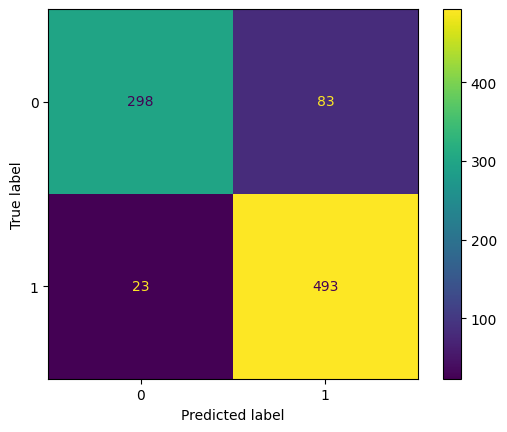

In [46]:
disp.plot()